In [9]:
from __future__ import print_function
import argparse
import os
import sys
import random
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.backends.cudnn as cudnn
cudnn.benchmark = True
cudnn.fastest = True
import torch.optim as optim
import torchvision.utils as vutils
from torch.autograd import Variable

from misc import *
import models.mopnet as net
from models.vgg16 import Vgg16
from myutils import utils
from visualizer import Visualizer
import time
import torch.nn.functional as F
import scipy.stats as st
import datetime

from PIL import Image
import math
import numpy as np
import cv2
from collections import OrderedDict
import matplotlib.pyplot as plt

In [6]:
mean=(0.5, 0.5, 0.5)
std=(0.5, 0.5, 0.5)
from datasets.my_loader import my_loader as commonDataset
import transforms.pix2pix as transforms
dataset = commonDataset(root='test',
                        transform=transforms.Compose([
                            transforms.Scale(256),
                            transforms.CenterCrop(256),
                            transforms.ToTensor(),
                            transforms.Normalize(mean, std),
                        ]),
                        seed=None,
                        pre='',
                        label_file="")

dataloader = torch.utils.data.DataLoader(dataset, 
                                        batch_size=1, 
                                        shuffle=False,
                                        num_workers=int(1))

In [8]:
transforms.Scale

transforms.pix2pix.Scale

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


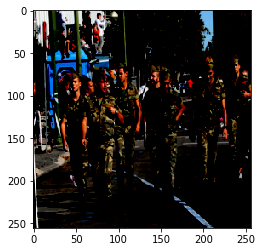

In [7]:
for i, data in enumerate(dataloader, 0):
    input_cpu, target_cpu = data
    target_img = target_cpu[0].permute(1, 2, 0)
    imshow(target_img)
    break

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


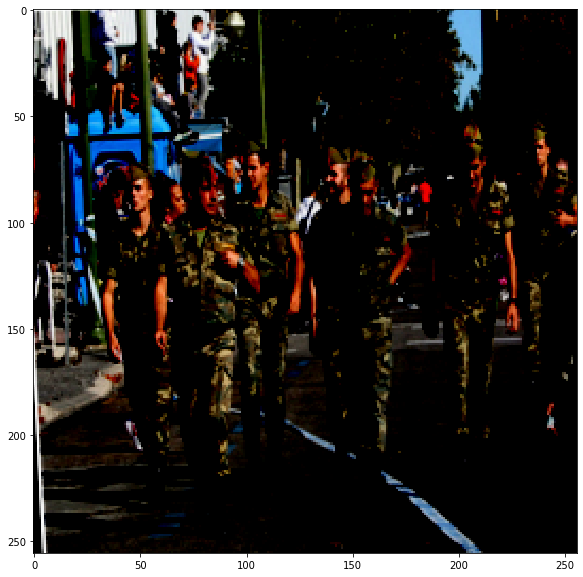

In [11]:
fig = plt.figure(figsize = (10,10))
plt.imshow(target_img)